# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | crane
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | utrik
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | puerto carreno
Processing Record 10 of Set 1 | port mathurin
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | ahau
City not found. Skipping...
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | minas de marcona
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | uturoa
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | a

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,new norfolk,-42.7826,147.0587,30.70,30,61,1.80,AU,1736472686
1,crane,31.3974,-102.3501,4.66,57,11,4.99,US,1736472687
2,port-aux-francais,-49.3500,70.2167,4.34,92,100,23.35,TF,1736472688
3,utrik,11.2278,169.8474,26.79,78,6,9.55,MH,1736472690
4,arraial do cabo,-22.9661,-42.0278,23.94,80,96,4.73,BR,1736472691


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,30.70,30,61,1.80,AU,1736472686
1,crane,31.3974,-102.3501,4.66,57,11,4.99,US,1736472687
2,port-aux-francais,-49.3500,70.2167,4.34,92,100,23.35,TF,1736472688
3,utrik,11.2278,169.8474,26.79,78,6,9.55,MH,1736472690
4,arraial do cabo,-22.9661,-42.0278,23.94,80,96,4.73,BR,1736472691


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

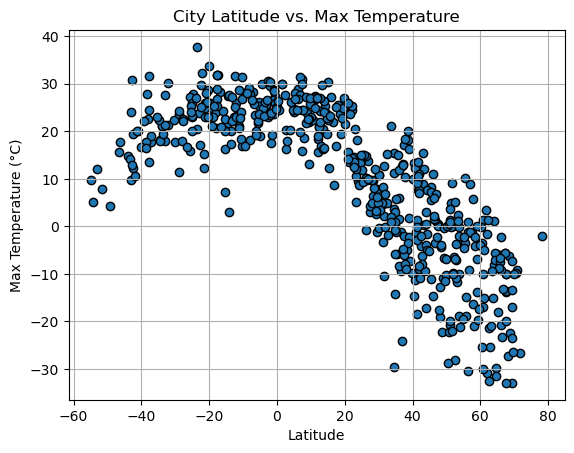

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

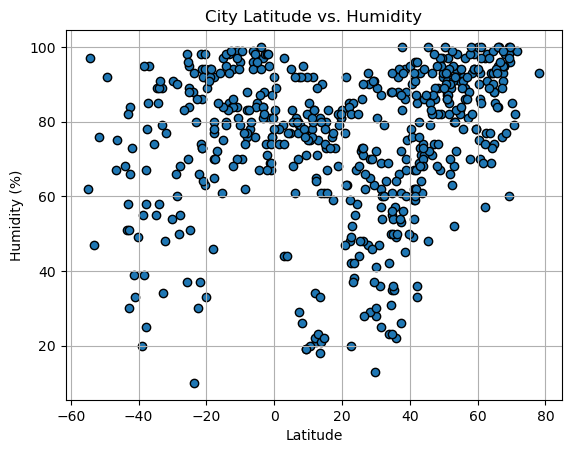

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

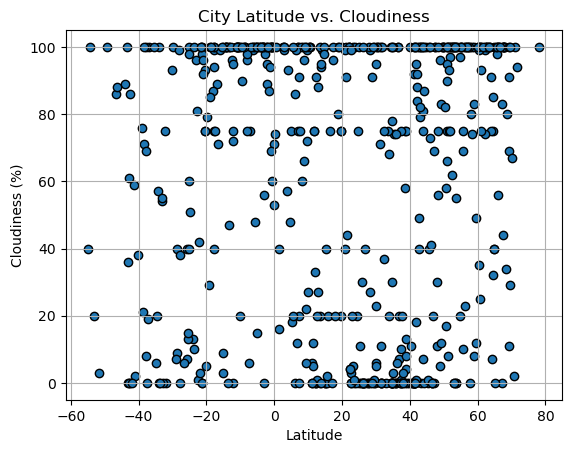

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

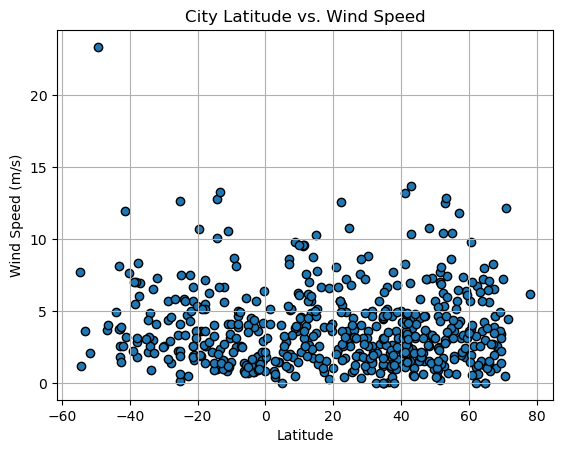

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x_values, y_values):
    slope, intercept, rvalue, _, _ = linregress(x_values, y_values)
    regress_line = slope * x_values + intercept
    return slope, intercept, rvalue, regress_line


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770
6,machico,32.7000,-16.7667,20.40,81,40,5.66,PT,1718607772
8,howrah,22.5892,88.3103,36.00,67,40,6.17,IN,1718607544


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,new norfolk,-42.7826,147.0587,30.70,30,61,1.80,AU,1736472686
2,port-aux-francais,-49.3500,70.2167,4.34,92,100,23.35,TF,1736472688
4,arraial do cabo,-22.9661,-42.0278,23.94,80,96,4.73,BR,1736472691
5,ushuaia,-54.8000,-68.3000,9.81,62,40,7.72,AR,1736472463
7,punta arenas,-53.1500,-70.9167,12.06,47,20,3.60,CL,1736472694


###  Temperature vs. Latitude Linear Regression Plot

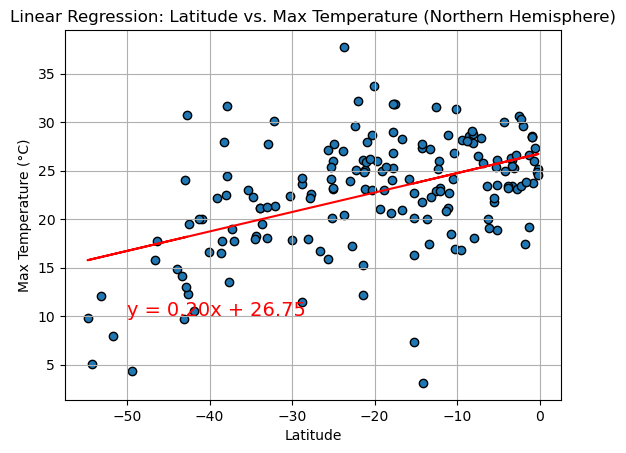

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, _, _ = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolor="black")

# Plot the regression line
plt.plot(x_values, regress_line, "r-")

# Add graph properties
plt.title("Linear Regression: Latitude vs. Max Temperature (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.text(-50, 10, f"y = {slope:.2f}x + {intercept:.2f}", color="red", fontsize=14)


# Save and show the plot
plt.savefig("output_data/Northern_Lat_vs_Temp_Regression.png")
plt.show()

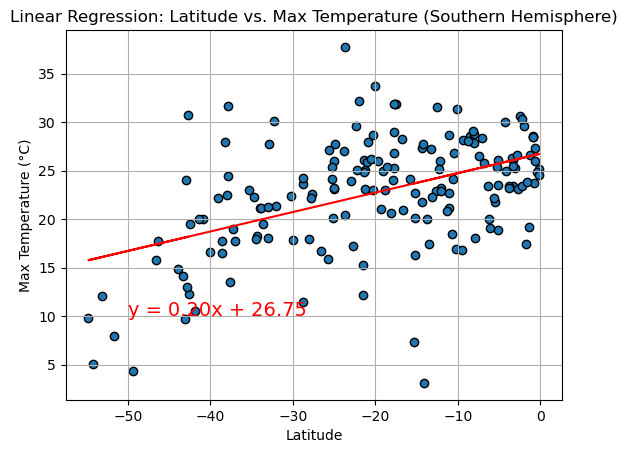

In [35]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, _, _ = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolor="black")

# Plot the regression line
plt.plot(x_values, regress_line, "r-")

# Add graph properties
plt.title("Linear Regression: Latitude vs. Max Temperature (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)
plt.text(-50, 10, f"y = {slope:.2f}x + {intercept:.2f}", color="red", fontsize=14)

# Save and show the plot
plt.savefig("output_data/Southern_Lat_vs_Temp_Regression.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

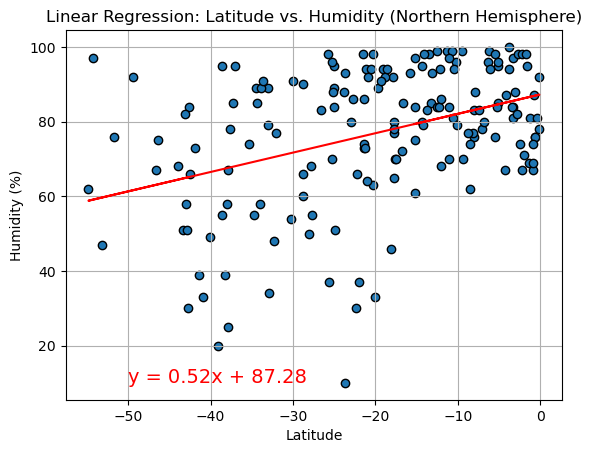

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, _, _ = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolor="black")

# Plot the regression line
plt.plot(x_values, regress_line, "r-")

# Add graph properties
plt.title("Linear Regression: Latitude vs. Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.text(-50, 10, f"y = {slope:.2f}x + {intercept:.2f}", color="red", fontsize=14)

# Save and show the plot
plt.savefig("output_data/Northern_Lat_vs_Humidity_Regression.png")
plt.show()

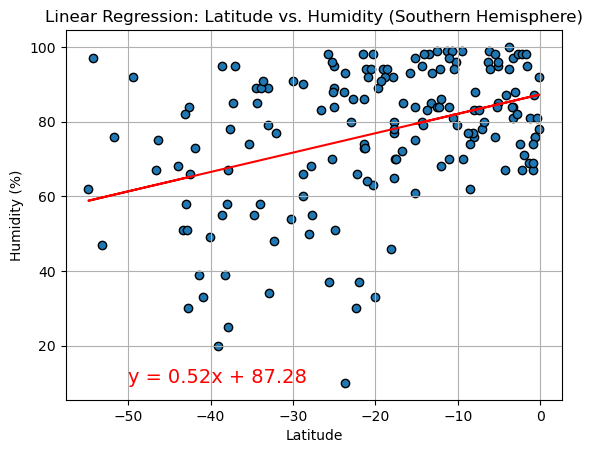

In [39]:
# Southern Hemisphere
# Linear regression on Southern Hemisphere for Latitude vs. Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, _, _ = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolor="black")

# Plot the regression line
plt.plot(x_values, regress_line, "r-")

# Add graph properties
plt.title("Linear Regression: Latitude vs. Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Display the equation on the chart
plt.text(-50, 10, f"y = {slope:.2f}x + {intercept:.2f}", color="red", fontsize=14)

# Save and show the plot
plt.savefig("output_data/Southern_Lat_vs_Humidity_Regression.png")
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

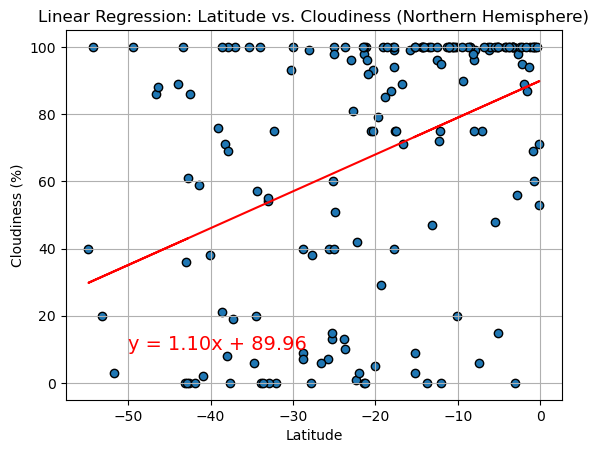

In [42]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, _, _ = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolor="black")

# Plot the regression line
plt.plot(x_values, regress_line, "r-")

# Add graph properties
plt.title("Linear Regression: Latitude vs. Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Display the equation on the chart
plt.text(-50, 10, f"y = {slope:.2f}x + {intercept:.2f}", color="red", fontsize=14)

# Save and show the plot
plt.savefig("output_data/Northern_Lat_vs_Cloudiness_Regression.png")
plt.show()

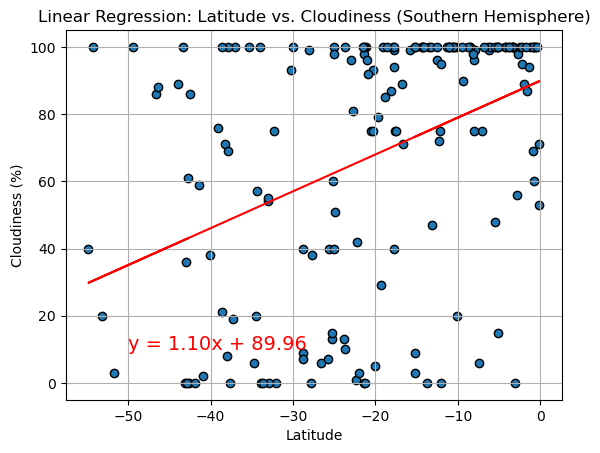

In [43]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, _, _ = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolor="black")

# Plot the regression line
plt.plot(x_values, regress_line, "r-")

# Add graph properties
plt.title("Linear Regression: Latitude vs. Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Display the equation on the chart
plt.text(-50, 10, f"y = {slope:.2f}x + {intercept:.2f}", color="red", fontsize=14)

# Save and show the plot
plt.savefig("output_data/Northern_Lat_vs_Cloudiness_Regression.png")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

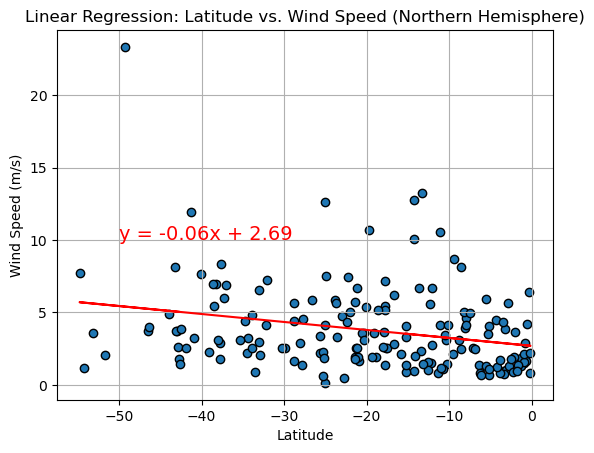

In [45]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, _, _ = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolor="black")

# Plot the regression line
plt.plot(x_values, regress_line, "r-")

# Add graph properties
plt.title("Linear Regression: Latitude vs. Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Display the equation on the chart
plt.text(-50, 10, f"y = {slope:.2f}x + {intercept:.2f}", color="red", fontsize=14)

# Save and show the plot
plt.savefig("output_data/Northern_Lat_vs_WindSpeed_Regression.png")
plt.show()

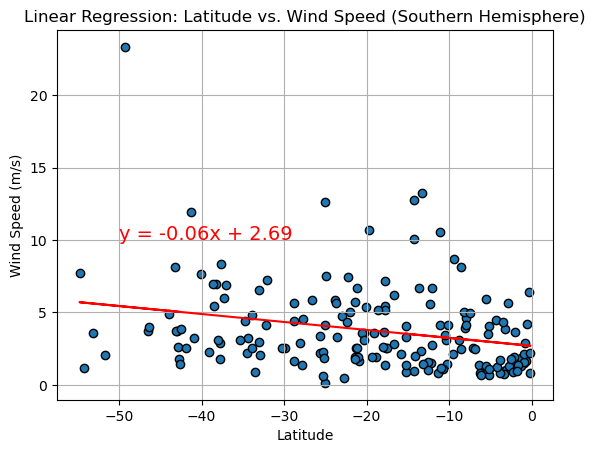

In [46]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, _, _ = linregress(x_values, y_values)
regress_line = slope * x_values + intercept

# Create scatter plot
plt.scatter(x_values, y_values, edgecolor="black")

# Plot the regression line
plt.plot(x_values, regress_line, "r-")

# Add graph properties
plt.title("Linear Regression: Latitude vs. Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Display the equation on the chart
plt.text(-50, 10, f"y = {slope:.2f}x + {intercept:.2f}", color="red", fontsize=14)

# Save and show the plot
plt.savefig("output_data/Northern_Lat_vs_WindSpeed_Regression.png")
plt.show()

**Discussion about the linear relationship:** The linear regression lines show the trend in latitudes as they near the equator (latitude 0) - as locations get closer to the equator, temperature, humidity, and cloudiness tend to increase, while wind speed tends to decrease.